Seraina Kytili 9728
---
Matthieu Ndumbi Lukuenya 9217
---


# Imports

In [6]:
# Imports.

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, f1_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier


# Preprocessing

In [7]:
# Preprocessing.
# Insert the dataset into a Dataframe called movies_df
df = pd.read_csv("/datasetC.csv", header=None)
final_x_test = pd.read_csv("/datasetCTest.csv", header=None)

# Separate into X (features) and y (label)
X = df.iloc[:, :-1] # Select all columns except the last one
y = df.iloc[:, -1] # Select the last column

# Step 1: Data Splitting into train, validation and test dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Get the shape of the dataset
print(df.shape)
print(final_x_test.shape)

# Get min, max value of the dataset
minimum_value = df.min().min()
maximum_value = df.max().max()

print("Minimum Value of Train dataset:", minimum_value)
print("Maximum Value of Train dataset:", maximum_value)

# Get min, max value of the datasetC_test
minimum_value_test = final_x_test.min().min()
maximum_value_test = final_x_test.max().max()

print("Minimum Value of Test dataset:", minimum_value_test)
print("Maximum Value of Test dataset:", maximum_value_test)

(5000, 401)
(1000, 400)
Minimum Value of Train dataset: -4.4854
Maximum Value of Train dataset: 5.1581
Minimum Value of Test dataset: -4.2736
Maximum Value of Test dataset: 4.7749


Missing values

0
0


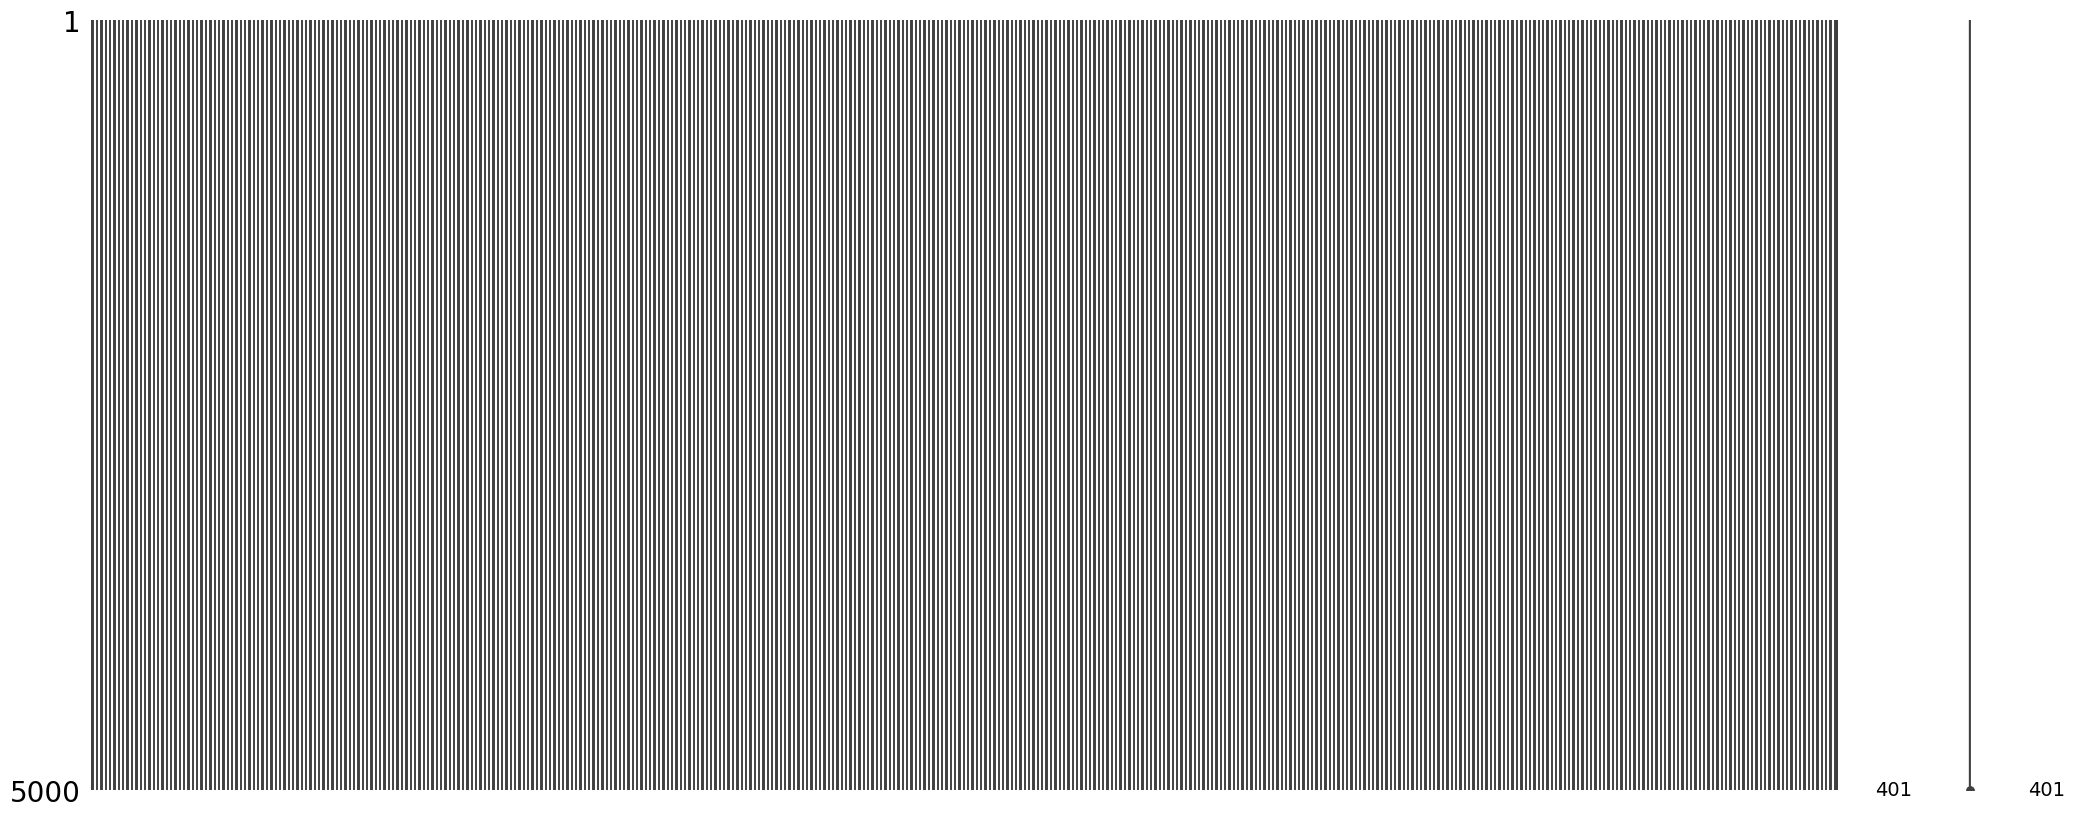

In [ ]:
# Check by visualization if there are missing values
import missingno as msno
msno.matrix(df)

# Double - Check by calculations if there are missing values
# Check if the missing values across the matrix are equal to 0
# Print the result of all raws
print(df.isnull().sum().sum())
print(final_x_test.isnull().sum().sum())


Balanced labels

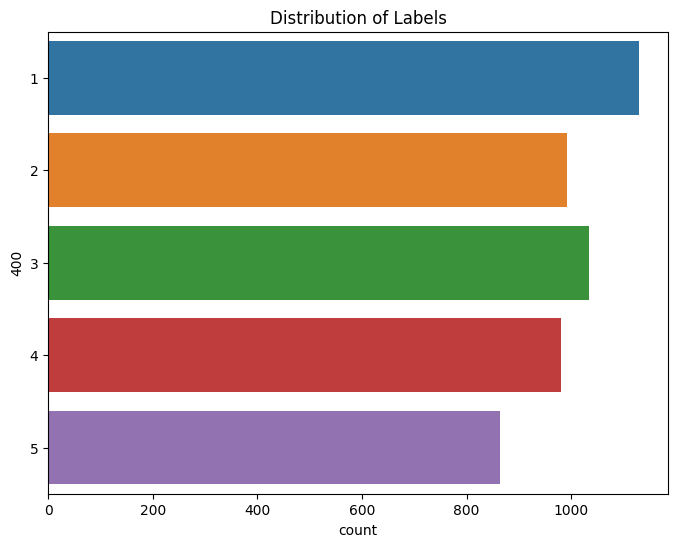

In [ ]:
# Check if the labels are balanced.

# Plot the distribution of labels
plt.figure(figsize=(8, 6))
sns.countplot(y=y)
plt.title('Distribution of Labels')
plt.show()

# Functions

## Train and Evaluate Model

In [8]:
def train_and_evaluate_model(model, param_grid, X_train, y_train, X_val, y_val, X_test, y_test):
    """
    Train and evaluate a model using grid search.

    Parameters:
    - model: The scikit-learn model (e.g., RandomForestClassifier, XGBClassifier).
    - param_grid: The parameter grid for grid search.
    - X_train, y_train: Training set.
    - X_val, y_val: Validation set.
    - X_test, y_test: Test set.

    Returns:
    grid_result
    """
    # Step 1: Grid Search with Cross-Validation on Training Set
    scorer = make_scorer(accuracy_score)
    #scorer = make_scorer(f1_score, average='weighted')
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5)
    grid_result = grid_search.fit(X_train, y_train)

    # Step 2: Print the best parameters and best score
    print("Best Parameters: ", grid_result.best_params_)
    print("Best Accuracy on Training Set: ", grid_result.best_score_)

    # Step 3: Evaluate on the Validation Set with the Best Model
    best_model = grid_result.best_estimator_
    val_predictions = best_model.predict(X_val)

    # Evaluate and print metrics on the validation set
    val_accuracy = accuracy_score(y_val, val_predictions)
    print("Accuracy on Validation Set with the best model: ", val_accuracy)

    # Step 4: Evaluate on the Test Set with the Best Model
    test_predictions = best_model.predict(X_test)

    # Evaluate and print metrics on the test set
    test_accuracy = accuracy_score(y_test, test_predictions)
    print("Accuracy on Test Set with the best model: ", test_accuracy)

    return grid_result


## Display GridSearch Results

In [9]:
def display_grid_search_results(grid_result):
    """
    Display and sort the results of a grid search.

    Parameters:
    - grid_result: The result from the scikit-learn GridSearchCV.

    Returns:
    None
    """
    # Print Scores from Grid Search
    cv_results = pd.DataFrame(grid_result.cv_results_)
    print("\nAll Scores from Grid Search:")
    print(cv_results[['params', 'mean_test_score']])

    # Sort the DataFrame by mean_test_score in descending order
    cv_results_sorted = cv_results.sort_values(by='mean_test_score', ascending=False)

    # Display all values without truncation
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_colwidth', None)

    print("\nHyperparameters sorted by Mean Test Score in Descending Order:")
    print(cv_results_sorted[['params', 'mean_test_score']])

    # Reset display options to default
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_colwidth')

# Models

## Naive Bayes

In [ ]:
# NAIVE BAYES CLASSIFIER

# Define the model (No hyperparameters for GaussianNB)
model_nb = GaussianNB()

# Train and evaluate the Naive Bayes Classifier
grid_result_nb = train_and_evaluate_model(model_nb, {}, X_train, y_train, X_val, y_val, X_test, y_test)

# Display results
display_grid_search_results(grid_result_nb)

Best Parameters:  {}
Best Accuracy on Training Set:  0.7939999999999999
Accuracy on Validation Set with the best model:  0.7746666666666666
Accuracy on Test Set with the best model:  0.8173333333333334

All Scores from Grid Search:
  params  mean_test_score
0     {}            0.794

Hyperparameters sorted by Mean Test Score in Descending Order:
  params  mean_test_score
0     {}            0.794


## Logistic Regression

In [ ]:
# LOGISTIC REGRESSION

# Define the model and parameter grid for grid search
model_lr = LogisticRegression()
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],      # Regularization parameter
    'solver': ['liblinear', 'lbfgs'],    # Optimization algorithm
    'max_iter': [100, 200, 300]           # Maximum number of iterations
}

# Train and evaluate the Logistic Regression using grid search
grid_result_lr = train_and_evaluate_model(model_lr, param_grid_lr, X_train, y_train, X_val, y_val, X_test, y_test)

# Display results
display_grid_search_results(grid_result_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters:  {'C': 0.01, 'max_iter': 100, 'solver': 'lbfgs'}
Best Accuracy on Training Set:  0.8182857142857142
Accuracy on Validation Set with the best model:  0.7813333333333333
Accuracy on Test Set with the best model:  0.8146666666666667

All Scores from Grid Search:
                                               params  mean_test_score
0   {'C': 0.001, 'max_iter': 100, 'solver': 'libli...         0.812000
1    {'C': 0.001, 'max_iter': 100, 'solver': 'lbfgs'}         0.816857
2   {'C': 0.001, 'max_iter': 200, 'solver': 'libli...         0.812000
3    {'C': 0.001, 'max_iter': 200, 'solver': 'lbfgs'}         0.816857
4   {'C': 0.001, 'max_iter': 300, 'solver': 'libli...         0.812000
5    {'C': 0.001, 'max_iter': 300, 'solver': 'lbfgs'}         0.816857
6   {'C': 0.01, 'max_iter': 100, 'solver': 'liblin...         0.817143
7     {'C': 0.01, 'max_iter': 100, 'solver': 'lbfgs'}         0.818286
8   {'C': 0.01, 'max_iter': 200, 'solver': 'liblin...         0.817143
9     {'C': 0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## K-Nearest Neighbors (KNN)

In [ ]:
# K-NEAREST NEIGHBORS (KNN) CLASSIFIER

# Define the model and parameter grid for grid search
model_knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],          # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'p': [1, 2]                           # Power parameter for Minkowski distance
}

# Train and evaluate the KNN using grid search
grid_result_knn = train_and_evaluate_model(model_knn, param_grid_knn, X_train, y_train, X_val, y_val, X_test, y_test)

# Display results
display_grid_search_results(grid_result_knn)

Best Parameters:  {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
Best Accuracy on Training Set:  0.7417142857142857
Accuracy on Validation Set with the best model:  0.7373333333333333
Accuracy on Test Set with the best model:  0.7546666666666667

All Scores from Grid Search:
                                               params  mean_test_score
0    {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}         0.643143
1   {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}         0.658857
2    {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}         0.665429
3   {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}         0.682857
4    {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}         0.682000
5   {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}         0.699429
6    {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}         0.699429
7   {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}         0.718000
8    {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}         0.698571
9   {'n_nei

In [23]:
# K-NEAREST NEIGHBORS (KNN) CLASSIFIER

# Define the model
model_knn = KNeighborsClassifier(n_neighbors=23, weights='distance', p=2)

# Train and evaluate the KNN using grid search
grid_result_knn = train_and_evaluate_model(model_knn, param_grid_knn, X_train, y_train, X_val, y_val, X_test, y_test)

# Display results
display_grid_search_results(grid_result_knn)

Best Parameters:  {'n_neighbors': 23, 'p': 2, 'weights': 'distance'}
Best Accuracy on Training Set:  0.7545714285714287
Accuracy on Validation Set with the best model:  0.744
Accuracy on Test Set with the best model:  0.7533333333333333

All Scores from Grid Search:
                                              params  mean_test_score
0  {'n_neighbors': 23, 'p': 2, 'weights': 'uniform'}         0.742571
1  {'n_neighbors': 23, 'p': 2, 'weights': 'distan...         0.754571
2  {'n_neighbors': 23, 'p': 3, 'weights': 'uniform'}         0.735143
3  {'n_neighbors': 23, 'p': 3, 'weights': 'distan...         0.746000

Hyperparameters sorted by Mean Test Score in Descending Order:
                                               params  mean_test_score
1  {'n_neighbors': 23, 'p': 2, 'weights': 'distance'}         0.754571
3  {'n_neighbors': 23, 'p': 3, 'weights': 'distance'}         0.746000
0   {'n_neighbors': 23, 'p': 2, 'weights': 'uniform'}         0.742571
2   {'n_neighbors': 23, 'p': 3, 'we

## Support Vector Machine

In [ ]:
# SUPPORT VECTOR MACHINE

# Define the model and parameter grid
model_svm = SVC()
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Train and evaluate the SVC using grid search
grid_result_svm = train_and_evaluate_model(model_svm, param_grid_svm, X_train, y_train, X_val, y_val, X_test, y_test)

# Display results
display_grid_search_results(grid_result_svm)


Best Parameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy on Training Set:  0.8411428571428571
Accuracy on Validation Set with the best model:  0.836
Accuracy on Test Set with the best model:  0.8493333333333334


In [56]:
# SUPPORT VECTOR MACHINE

# Define the model and parameter grid
model_svm = SVC()
param_grid_svm = {
    'C': [0.1, 0.5, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
}

# Train and evaluate the SVC using grid search
grid_result_svm = train_and_evaluate_model(model_svm, param_grid_svm, X_train, y_train, X_val, y_val, X_test, y_test)

# Display results
display_grid_search_results(grid_result_svm)

Best Parameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy on Training Set:  0.8411428571428571
Accuracy on Validation Set with the best model:  0.836
Accuracy on Test Set with the best model:  0.8493333333333334

All Scores from Grid Search:
                                               params  mean_test_score
0    {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}         0.761714
1       {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}         0.689714
2      {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}         0.229429
3   {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}         0.801143
4     {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}         0.761714
..                                                ...              ...
95     {'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}         0.713429
96     {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}         0.758857
97        {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}         0.817429
98       {'C': 100, 'gamma': 0

## Multiplayer Perceptron (MLP)

In [ ]:
# MULTIPLAYER PERCEPTRON (MLP) CLASSIFIER

# Define the model and parameter grid for grid search
model_mlp = MLPClassifier()
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (50, 50), (50, 30, 20)], # Architecture of hidden layers
    'activation': ['relu', 'tanh'], # Activation function
    'solver': ['adam', 'sgd'], # Optimization algorithm for weight updates
    'alpha': [0.0001, 0.001, 0.01], # Controls L2 regularization strength
}

# Train and evaluate the MLP using grid search
grid_result_mlp = train_and_evaluate_model(model_mlp, param_grid_mlp, X_train, y_train, X_val, y_val, X_test, y_test)

# Display results
display_grid_search_results(grid_result_mlp)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Parameters:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Best Accuracy on Training Set:  0.812
Accuracy on Validation Set with the best model:  0.7826666666666666
Accuracy on Test Set with the best model:  0.816

All Scores from Grid Search:
                                               params  mean_test_score
0   {'activation': 'relu', 'alpha': 0.0001, 'hidde...         0.810286
1   {'activation': 'relu', 'alpha': 0.0001, 'hidde...         0.796000
2   {'activation': 'relu', 'alpha': 0.0001, 'hidde...         0.796571
3   {'activation': 'relu', 'alpha': 0.0001, 'hidde...         0.780000
4   {'activation': 'relu', 'alpha': 0.0001, 'hidde...         0.794000
5   {'activation': 'relu', 'alpha': 0.0001, 'hidde...         0.770571
6   {'activation': 'relu', 'alpha': 0.001, 'hidden...         0.808000
7   {'activation': 'relu', 'alpha': 0.001, 'hidden...         0.793143
8   {'activation': 'relu', 'alpha': 0.001, 'hidden...         0.798286
9

## Random Forest

In [ ]:
# RANDOM FOREST

# Define the RandomForestClassifier model and parameter grid
model_rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Train and evaluate the RandomForestClassifier using grid search
grid_result_rf = train_and_evaluate_model(model_rf, param_grid_rf, X_train, y_train, X_val, y_val, X_test, y_test)

# Display results
display_grid_search_results(grid_result_rf)

KeyboardInterrupt: ignored

In [57]:
# RANDOM FOREST

# Define the RandomForestClassifier model and parameter grid
model_rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [650],
    'max_depth': [40],
    'min_samples_split': [10],
    'min_samples_leaf': [4],
}

# Train and evaluate the RandomForestClassifier using grid search
grid_result_rf = train_and_evaluate_model(model_rf, param_grid_rf, X_train, y_train, X_val, y_val, X_test, y_test)

# Display results
display_grid_search_results(grid_result_rf)

Best Parameters:  {'max_depth': 40, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 650}
Best Accuracy on Training Set:  0.7485714285714286
Accuracy on Validation Set with the best model:  0.7373333333333333
Accuracy on Test Set with the best model:  0.7626666666666667

All Scores from Grid Search:
                                              params  mean_test_score
0  {'max_depth': 40, 'min_samples_leaf': 4, 'min_...         0.748571

Hyperparameters sorted by Mean Test Score in Descending Order:
                                                                                   params  \
0  {'max_depth': 40, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 650}   

   mean_test_score  
0         0.748571  


## XGBoost

In [ ]:
# XGBOOST

# Labels must have integer values starting from 0
y_train =  y_train - 1
y_val = y_val - 1
y_test = y_test - 1

# Define the model and parameter grid for grid search
model_xgb = XGBClassifier()
param_grid_xgb = {
    'n_estimators': [50],
    'learning_rate': [0.01],
    'max_depth': [5],
    'subsample': [1] ,
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Train and evaluate the SVC using grid search
grid_result_svm = train_and_evaluate_model(model_xgb, param_grid_xgb, X_train, y_train, X_val, y_val, X_test, y_test)

# Display results
display_grid_search_results(grid_result_svm)

# Assign the original values for y
y_train =  y_train + 1
y_val = y_val + 1
y_test = y_test + 1

NameError: ignored

## Voting Classifier

In [10]:
# VOTING CLASSIFIER

# Define the base models
model_svm = SVC(probability=True)
model_rf = RandomForestClassifier(random_state=42)
model_mlp = MLPClassifier()

# Define the ensemble model
#model_vc = VotingClassifier(estimators=[('svm', model_svm), ('rf', model_rf)],
#                            voting='soft')
model_vc = VotingClassifier(estimators=[('svm', model_svm), ('mlp', model_mlp),
                                        ('rf', model_rf)], voting='soft')

# Define the parameter grid for grid search
param_grid_vc = {
    'svm__C': [0.1, 1, 10],           # SVM regularization parameter
    'rf__n_estimators': [200], # Number of trees in the Random Forest
    'mlp__hidden_layer_sizes': [(100,)], # Architecture of hidden layers
    'mlp__activation': ['relu'], # Activation function
    'mlp__solver': ['adam'], # Optimization algorithm for weight updates
    'mlp__alpha': [ 0.001, 0.01], # Controls L2 regularization strength
}

# Train and evaluate the Voting Classifier using grid search
grid_result_vc = train_and_evaluate_model(model_vc, param_grid_vc, X_train,
                                          y_train, X_val, y_val, X_test, y_test)

# Display results
display_grid_search_results(grid_result_vc)

Best Parameters:  {'mlp__activation': 'relu', 'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (100,), 'mlp__solver': 'adam', 'rf__n_estimators': 200, 'svm__C': 10}
Best Accuracy on Training Set:  0.8348571428571429
Accuracy on Validation Set with the best model:  0.804
Accuracy on Test Set with the best model:  0.8186666666666667

All Scores from Grid Search:
                                              params  mean_test_score
0  {'mlp__activation': 'relu', 'mlp__alpha': 0.00...         0.823714
1  {'mlp__activation': 'relu', 'mlp__alpha': 0.00...         0.829143
2  {'mlp__activation': 'relu', 'mlp__alpha': 0.00...         0.830571
3  {'mlp__activation': 'relu', 'mlp__alpha': 0.01...         0.829143
4  {'mlp__activation': 'relu', 'mlp__alpha': 0.01...         0.825143
5  {'mlp__activation': 'relu', 'mlp__alpha': 0.01...         0.834857

Hyperparameters sorted by Mean Test Score in Descending Order:
                                                                                     

## Stacking


In [66]:
# STACKING
# Define the base models
svm = SVC(C=0.8, gamma='scale', kernel='rbf', probability=True)
model_rf = RandomForestClassifier(max_depth=40, min_samples_leaf=4, min_samples_split=10, n_estimators=650)
model_mlp = MLPClassifier(activation='relu', alpha=0.01, hidden_layer_sizes=(100,), solver='adam')
model_knn = KNeighborsClassifier(n_neighbors=23, p=2, weights='distance')

# Define the stacking model with Logistic Regression as the meta-estimator
model_stacking = StackingClassifier(estimators=[('svm', model_svm), ('rf', model_rf),
                                                ('knn', model_knn), ('mlp', model_mlp)],
                                    final_estimator=model_rf)

# Define the parameter grid for grid search
param_grid_stacking = {
    'svm__C': [1],           # SVM regularization parameter
    #'rf__n_estimators': [100, 200],           # Number of trees in the Random Forest
    #'mlp__hidden_layer_sizes': [(100,)],          # Architecture of hidden layers
    #'mlp__activation': ['relu'],                  # Activation function
    #'mlp__solver': ['adam'],                      # Optimization algorithm for weight updates
    #'mlp__alpha': [0.0001, 0.001, 0.01],          # Controls L2 regularization strength
}

# Train and evaluate the Stacking Classifier using grid search
grid_result_stacking = train_and_evaluate_model(model_stacking, param_grid_stacking, X_train,
                                                y_train, X_val, y_val, X_test, y_test)

# Display results
display_grid_search_results(grid_result_stacking)

Best Parameters:  {'svm__C': 1}
Best Accuracy on Training Set:  0.8571428571428571
Accuracy on Validation Set with the best model:  0.844
Accuracy on Test Set with the best model:  0.8613333333333333

All Scores from Grid Search:
          params  mean_test_score
0  {'svm__C': 1}         0.857143

Hyperparameters sorted by Mean Test Score in Descending Order:
          params  mean_test_score
0  {'svm__C': 1}         0.857143


## Bagged Desicion Trees

In [ ]:
# BAGGED DECISION TREES

# Define the base Decision Tree model
base_model = DecisionTreeClassifier()

# Define the BaggingClassifier model
bagged_model = BaggingClassifier(base_model, n_estimators=200, random_state=42)

# Train the BaggingClassifier model on the training data
bagged_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_bagged = bagged_model.predict(X_test)

# Calculate accuracy on the test data
accuracy_bagged = accuracy_score(y_test, y_pred_bagged)

# Display results
print("Accuracy of Bagged Decision Trees on the test dataset:", accuracy_bagged)


Accuracy of Bagged Decision Trees on the test dataset: 0.688


## Ada Boost

In [ ]:
# ADA BOOST

# Define the AdaBoostClassifier model and parameter grid
base_model = DecisionTreeClassifier()
model_adaboost = AdaBoostClassifier(base_model, random_state=42)
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
}

# Train and evaluate the AdaBoostClassifier using grid search
grid_result_adaboost = train_and_evaluate_model(model_adaboost, param_grid_adaboost, X_train, y_train, X_val, y_val, X_test, y_test)

# Display results
display_grid_search_results(grid_result_adaboost)

Best Parameters:  {'learning_rate': 0.01, 'n_estimators': 50}
Best Accuracy on Training Set:  0.3562857142857143
Accuracy on Validation Set with the best model:  0.364
Accuracy on Test Set with the best model:  0.3333333333333333

All Scores from Grid Search:
                                         params  mean_test_score
0   {'learning_rate': 0.01, 'n_estimators': 50}         0.356286
1  {'learning_rate': 0.01, 'n_estimators': 100}         0.356286
2  {'learning_rate': 0.01, 'n_estimators': 200}         0.356286
3    {'learning_rate': 0.1, 'n_estimators': 50}         0.356286
4   {'learning_rate': 0.1, 'n_estimators': 100}         0.356286
5   {'learning_rate': 0.1, 'n_estimators': 200}         0.356286
6      {'learning_rate': 1, 'n_estimators': 50}         0.356286
7     {'learning_rate': 1, 'n_estimators': 100}         0.356286
8     {'learning_rate': 1, 'n_estimators': 200}         0.356286

Hyperparameters sorted by Mean Test Score in Descending Order:
                          

# Final model

In [67]:
# FINAL PREDICTION

# Instantiate each model with its best parameters
random_forest = RandomForestClassifier(max_depth=40, min_samples_leaf=4, min_samples_split=10, n_estimators=650)
svm = SVC(C=0.8, gamma='scale', kernel='rbf', probability=True)
mlp = MLPClassifier(activation='relu', alpha=0.01, hidden_layer_sizes=(100,), solver='adam')
naive_bayes = GaussianNB()
xgboost = XGBClassifier(colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8)
model_knn = KNeighborsClassifier(n_neighbors=23, p=2, weights='distance')
model_lr = LogisticRegression(C=0.01)

# Create the ensemble model with soft voting
ensemble_model = VotingClassifier(estimators=[
    ('Random Forest', random_forest),
    ('SVM', svm),
    #('MLP', mlp),
    #('nb', naive_bayes),
    #('XGBoost', xgboost),
    #('LogReg', model_lr),
    ('Knn', model_knn)
], voting='soft')

# Create a stacking model with same mean error as ensemble model with soft voting
model_stacking = StackingClassifier(estimators=[('svm', model_svm), ('rf', model_rf),
                                                ('knn', model_knn), ('mlp', model_mlp)],
                                    final_estimator=model_rf)

# Train the model on the training data
model_stacking.fit(X_train, y_train -1)

# Make predictions on the test data
y_pred = model_stacking.predict(X_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred +1)

# Display results
print("Accuracy of Final model on the test dataset:", accuracy)


Accuracy of Final model on the test dataset: 0.8586666666666667


In [68]:
# Train the model on the training data
model_stacking.fit(X, y - 1)

# Make predictions on the test set
y_test_pred = model_stacking.predict(final_x_test)

# Print shape of y_test_pred
print(y_test_pred.shape)

# Convert to numpy Array and export the label
y_test_pred_np = np.array(y_test_pred +1)
np.save('labels22.npy', y_test_pred_np)

# Load the saved labels
loaded_labels = np.load('labels22.npy')

# Display the loaded labels
print("Loaded Labels:")
print(loaded_labels)

(1000,)
Loaded Labels:
[5 2 4 1 4 1 2 5 3 4 3 5 1 2 1 5 5 3 5 1 5 5 5 1 1 2 2 3 2 2 2 2 2 1 2 2 3
 5 3 3 1 2 2 5 4 2 1 5 2 4 3 2 1 2 1 3 2 1 2 4 1 1 3 2 1 3 3 1 3 4 1 4 5 1
 1 2 4 3 5 1 1 5 4 4 1 5 5 4 5 2 4 2 3 3 2 4 5 2 4 3 4 1 1 4 5 5 2 4 3 2 5
 5 5 4 5 3 1 5 3 4 2 1 1 1 4 5 3 2 5 2 1 5 5 1 4 1 2 1 4 3 4 4 2 4 3 5 2 1
 4 2 3 1 2 3 3 3 4 3 4 1 1 1 2 3 4 4 5 2 3 1 1 1 2 2 3 5 4 5 1 1 5 5 3 3 4
 3 4 5 1 3 5 3 2 3 3 2 1 2 3 1 3 1 2 1 3 3 5 2 3 5 4 5 2 4 5 1 1 5 3 3 1 1
 4 4 4 2 5 4 4 1 3 2 2 2 3 4 4 5 3 4 2 5 1 2 4 5 1 5 3 2 1 1 3 4 4 2 3 2 2
 5 1 5 1 5 1 5 4 2 1 1 4 4 1 1 5 2 1 3 2 4 2 5 1 1 2 2 2 5 4 5 4 3 1 2 2 3
 3 4 3 5 4 1 1 4 2 5 1 4 1 2 1 4 4 3 5 1 4 4 4 4 5 3 5 3 3 2 1 5 1 5 3 1 3
 1 4 2 1 1 3 3 3 4 2 5 1 1 2 2 4 1 4 4 3 2 5 5 4 4 1 1 2 1 2 4 3 3 3 2 4 2
 5 1 3 3 5 5 5 4 3 4 3 5 5 3 2 4 4 3 2 5 4 2 5 1 2 3 4 5 3 5 2 1 5 2 3 4 5
 4 5 5 1 1 2 3 3 4 3 5 4 1 1 1 4 2 3 4 3 4 4 1 3 1 4 4 5 3 3 5 1 3 3 4 1 1
 3 4 5 1 5 3 1 2 4 3 3 5 5 1 4 4 1 4 2 3 1 4 1 4 2 1 4 5 2 4 5 2 1 2 4 3 5
 2